In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
cov_data

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

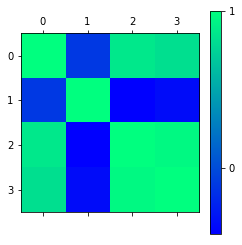

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.matshow(cov_data,cmap=plt.cm.winter)
plt.colorbar(img,ticks=[-1,0,1])

In [9]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(iris.data)
X_pca_2c.shape

(150, 2)

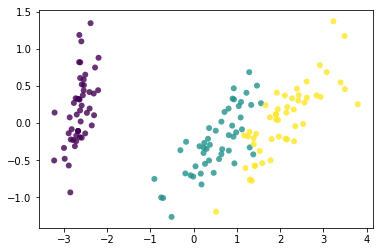

0.97763177502480336

In [10]:
plt.scatter(X_pca_2c[:,0],X_pca_2c[:,1],c=iris.target,alpha=.8,edgecolors='none')
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [11]:
PCA?

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


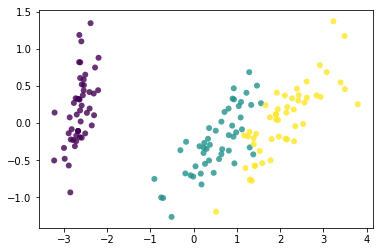

In [13]:
from sklearn.decomposition import RandomizedPCA
rpca_2c = RandomizedPCA(n_components=2)
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0],X_rpca_2c[:,1],c=iris.target,alpha=.8,edgecolors='none')
plt.show()

In [17]:
rpca_2c.explained_variance_ratio_.sum()
rpca_2c.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


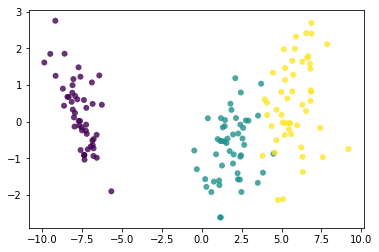

In [18]:
from sklearn.lda import LDA
lda_2c = LDA(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data,iris.target)
plt.scatter(X_lda_2c[:,0],X_lda_2c[:,1],c=iris.target,alpha=.8,edgecolors='none')
plt.show()

In [19]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
continuous_variables = [n for n in range(np.shape(boston.data)[1]) if n!=3]

In [20]:
continuous_variables

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [21]:
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])

In [22]:
outliers_rows,outliers_columns = np.where(np.abs(normalized_data)>3)

In [23]:
print(outliers_rows)

[ 55  56  57 102 141 199 200 201 202 203 204 225 256 257 262 283 284 347
 351 352 353 353 354 355 364 365 367 373 374 374 380 398 404 405 406 410
 410 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429
 431 436 437 438 445 450 454 455 456 457 466]


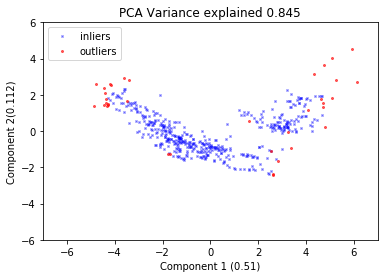

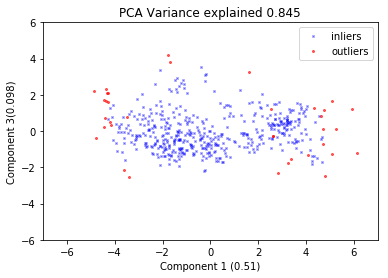

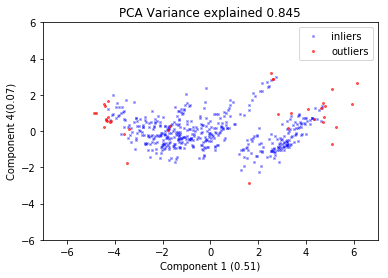

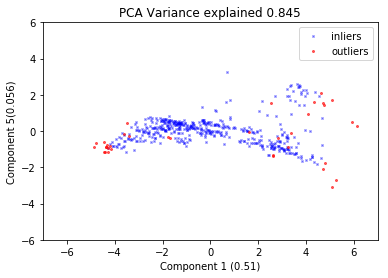

In [30]:
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn import svm
from sklearn.datasets import load_boston

boston = load_boston()
continuous_variables = [n for n in range(np.shape(boston.data)[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained' + ' ' +str(round(np.sum(pca.explained_variance_ratio_),3))

#oneClassSVM fitting and estimates
outliers_fraction = .02
nu_estimate = .95*outliers_fraction+0.05
machine_learning = svm.OneClassSVM(kernel='rbf',gamma=1.0/len(normalized_data),degree=3,nu=nu_estimate)
machine_learning.fit(normalized_data)
detection = machine_learning.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

#draw the distribution and the detected outliers
from matplotlib import pyplot as plt

for r in range(1,5):
    a = plt.plot(Zscore_components[regular,0],Zscore_components[regular,r],'x',markersize=2,color='blue',alpha=.6,label='inliers')
    b = plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,r],'o',markersize=2,color='red',alpha=.6,label='inliers')
    plt.xlabel('Component 1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
    plt.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
    plt.xlim([-7,7])
    plt.ylim([-6,6])
    plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
    plt.title(vtot)
    plt.show()

In [4]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=.50,random_state=4)

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]


In [5]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.DESCR)
X = digits.data
y = digits.target

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [10]:
from sklearn import svm
h1 = svm.LinearSVC(C=1.0)
h2 = svm.SVC(kernel='rbf',degree=3,gamma=0.001,C=1.0)
h3 = svm.SVC(kernel='poly',degree=3,C=1.0)

In [6]:
h1.fit(X,y)
print(h1.score(X,y))

0.990539788536


In [7]:
from sklearn import cross_validation

chosen_random_state = 1
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=.3,random_state=chosen_random_state)
print('X train shape %s, X test shape %s, \ny train shape %s, y test shape %s' %(X_train.shape,X_test.shape,y_train.shape,y_test.shape))
h1.fit(X_train,y_train)
print(h1.score(X_test,y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


X train shape (1257, 64), X test shape (540, 64), 
y train shape (1257,), y test shape (540,)
0.955555555556


In [11]:
import numpy as np

chosen_random_state = 1
cv_folds = 10
eval_scoring = 'accuracy'
workers = -1
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=.3,random_state = chosen_random_state)

for hypothesis in [h1,h2,h3]:
    scores = cross_validation.cross_val_score(hypothesis,X_train,y_train,cv=cv_folds,scoring=eval_scoring,n_jobs=workers)
    print('%s -> corss validation accuracy: mean = %.3f std = %.3f' % (hypothesis,np.mean(scores),np.std(scores)))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) -> corss validation accuracy: mean = 0.930 std = 0.022
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> corss validation accuracy: mean = 0.990 std = 0.007
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) -> corss validation accuracy: mean = 0.987 std = 0.010


In [13]:
scores

array([ 0.96899225,  0.96899225,  0.9921875 ,  0.98412698,  0.99206349,
        1.        ,  1.        ,  0.984     ,  0.99186992,  0.98347107])

In [14]:
kfolding = cross_validation.KFold(n=100,n_folds=10,shuffle=True,random_state=1)
for train_idx,validation_idx in kfolding:
    print(train_idx,validation_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 70 71 72 73 74 75 76 77 78 79
 83 85 86 87 88 89 90 91 92 94 95 96 97 98 99] [17 33 36 65 69 80 81 82 84 93]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 33 34 35 36 37 38 40 41 42 43 45 46 47 48 49 50 53 54 55 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83
 84 85 86 87 88 89 90 91 93 94 95 96 97 98 99] [10 31 32 39 44 51 52 56 78 92]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 36 37 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93 95 96 98 99] [ 2 19 27 35 38 46 62 73 94 97]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26

In [15]:
subsampling = cross_validation.ShuffleSplit(n=100,n_iter=10,test_size=.1,random_state=1)
for train_idx,validation_idx in subsampling:
    print(train_idx,validation_idx)

[92 39 56 52 51 32 31 44 78 10  2 73 97 62 19 35 94 27 46 38 67 99 54 95 88
 40 48 59 23 34 86 53 77 15 83 41 45 91 26 98 43 55 24  4 58 49 21 87  3 74
 30 66 70 42 47 89  8 60  0 90 57 22 61 63  7 96 13 68 85 14 29 28 11 18 20
 50 25  6 71 76  1 16 64 79  5 75  9 72 12 37] [80 84 33 81 93 17 36 82 69 65]
[50  0 29 16 46 61 28 51 31  8 47  4 98 56 78 58  9 83 53 27 67 34 59 97 80
 14 40 19 62 92 25 63 69 49 33 89 37 79 55 88 42 17  5 15 64 48 39 74 66 99
 22 18 41 71 54 86 95 73 60 65 12 32 84 24 81 23 10 13 57 68 45 90 36 30 20
 43 94 93 72 77  7 75 21 91 76  2 70 85 52  6] [44 96  1 35 26 11 38 82 87  3]
[97 63 91 70 43 11 46 94 21 89 61 36 57 90 58  9 12 18 29 16 51 25  6 13 69
 22 88 40 35 56 76 73  0  4 17 59 66 62 98 10 42 65 23 49 75  5 39 68 38 87
 37 81 78  3 72 85 34 60 47 53  7 26 19 14 30 15 44 20 24 64 41 79 50 77 86
 93  8 74 92 31 82 55 28 32 54 48 83 84  2 33] [95 67 96 71  1 80 99 45 52 27]
[ 0  7 92 61 60 15 99 86 72 70 80 50 49 62 65 34  8 75 63 14 57  4 46 21 53
 17

In [16]:
h = svm.SVC()
hp = svm.SVC(probability=True,random_state=1)


In [17]:
from sklearn import grid_search

search_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
scorer = 'accuracy'

search_func = grid_search.GridSearchCV(estimator=h,param_grid=search_grid,scoring=scorer,n_jobs=-1,iid=False,refit=True,cv=10)
%timeit search_func.fit(X,y)
print(search_func.best_estimator_)
print(search_func.best_params_)
print(search_func.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1 loop, best of 3: 11.4 s per loop
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981081122784369


In [2]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectPercentile

X,y = make_classification(n_samples=800,n_features=100,n_informative=25,n_redundant=0,random_state=101)
from sklearn.feature_selection import chi2,f_classif
from sklearn.preprocessing import Binarizer,scale

Xbin = Binarizer().fit_transform(scale(X))
Selector_chi2 = SelectPercentile(chi2,percentile=25).fit(Xbin,y)
Selector_f_classif = SelectPercentile(f_classif,percentile=25).fit(X,y)

chi_scores = Selector_chi2.get_support()
f_classif_scores = Selector_f_classif.get_support()
selected = chi_scores & f_classif_scores

In [3]:
print(selected)

[False  True False False False False  True  True False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False  True  True
 False False  True False False False False False False  True False False
 False False False False False False  True False  True False False  True
 False  True False False False False  True False False False False False
  True False False False  True False False False  True  True False False
  True False False False False  True False False False False False False
 False False False  True]


In [4]:
from sklearn.cross_validation import train_test_split
X,y = make_classification(n_samples=100,n_features=100,n_informative=5,n_redundant=2,random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=101)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=101)
classifier.fit(X_train,y_train)
print('In-sample accuracy: %.3f' % classifier.score(X_train,y_train))
print('Out-sample accuracy: %.3f' % classifier.score(X_test,y_test))

In-sample accuracy: 1.000
Out-sample accuracy: 0.733


# 递归消除
logisticregression

In [7]:
from sklearn.feature_selection import RFECV

selector = RFECV(estimator=classifier,step=1,cv=10,scoring='accuracy')
selector.fit(X_train,y_train)
print('Optimal number of features: %d' % selector.n_features_)

Optimal number of features: 17


In [8]:
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s,y_train)
print('Out-sample accuracy: %.3f' % classifier.score(X_test_s,y_test))

Out-sample accuracy: 0.800


In [9]:
from sklearn.svm import LinearSVC

classifier = LogisticRegression(C=.1,penalty='l1',random_state=101)
classifier.fit(X_train,y_train)
print('Out-sample accuracy: %.3f' % classifier.score(X_test,y_test))

Out-sample accuracy: 0.933


# 第四章 机器学习

## 4.1 线性和逻辑回归

In [10]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=.2,random_state=0)

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_absolute_error

print('MAE',mean_absolute_error(y_test,y_pred))

MAE 3.84281058945


## 4.2 朴素贝叶斯

In [1]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=.2,random_state=0)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)



In [2]:
from sklearn.metrics import classification_report

classification_report(y_test,y_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        11\n          1       0.93      1.00      0.96        13\n          2       1.00      0.83      0.91         6\n\navg / total       0.97      0.97      0.97        30\n'

In [3]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



## 4.3 KNN

In [6]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split

mnist = fetch_mldata('MNIST original')
mnist.data,mnist.target = shuffle(mnist.data,mnist.target)
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=.8,random_state=0)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

KeyboardInterrupt: 

## 4.4 SVM

In [9]:
#获取数据
import urllib

target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnn1.bz2','wb') as W:
    W.write(urllib.request.urlopen(target_page).read())
    
from sklearn.datasets import load_svmlight_file

X_train,y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train,y_train = X_train[:first_rows,:],y_train[:first_rows]


In [10]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC

hypothesis = SVC(kernel='rbf',degree=2,random_state=101)
scores = cross_val_score(hypothesis,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
print('SVC with rbf kernel -> cross validation accuracy: mean = %.3f std = %.3f' % (np.mean(scores),np.std(scores)))

SVC with rbf kernel -> cross validation accuracy: mean = 0.910 std = 0.001


交叉验证和网格搜索

In [13]:
from sklearn.datasets import load_svmlight_file

X_train,y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train,y_train = X_train[:first_rows,:],y_train[:first_rows]

from sklearn.svm import SVC
from sklearn.grid_search import RandomizedSearchCV
hypothesis = SVC(kernel='rbf',random_state=101)
search_dict = {'degree':[2,3],'C':[0.01,0.1,1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001]}
search_func = RandomizedSearchCV(estimator=hypothesis,param_distributions=search_dict,n_iter=30,scoring='accuracy',n_jobs=-1,
                                iid=True,refit=True,cv=5,random_state=101)
search_func.fit(X_train,y_train)
print('Best parameters %s' % search_func.best_params_)
print('Cross validation accuracy: mean = %.3f' % search_func.best_score_)


Best parameters {'gamma': 0.1, 'degree': 3, 'C': 100}
Cross validation accuracy: mean = 0.998


In [17]:
from sklearn import grid_search
help(grid_search.GridSearchCV)

Help on class GridSearchCV in module sklearn.grid_search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  .. deprecated:: 0.18
 |      This module will be removed in 0.20.
 |      Use :class:`sklearn.model_selection.GridSearchCV` instead.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      A object of that type is instantiated for each grid point.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Eith

In [18]:
help(grid_search.RandomizedSearchCV)

Help on class RandomizedSearchCV in module sklearn.grid_search:

class RandomizedSearchCV(BaseSearchCV)
 |  Randomized search on hyper parameters.
 |  
 |  .. deprecated:: 0.18
 |      This module will be removed in 0.20.
 |      Use :class:`sklearn.model_selection.RandomizedSearchCV` instead.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 |  given by n_iter.
 |  
 |  If all parameters are presented as a list,
 |  sampling without replacement

## 4.5 组合策略

In [19]:
from sklearn.datasets import fetch_covtype

covertype_dataset = fetch_covtype(random_state=101,shuffle=True)
print(covertype_dataset.DESCR)

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



In [20]:
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir','Lodgepole Fine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']

In [22]:
#baging
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_covtype
import numpy as np

covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir','Lodgepole Fine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1),max_samples=.7,max_features=.7,n_estimators=100)
scores = cross_val_score(hypothesis,covertype_X,covertype_y,cv=3,scoring='accuracy',n_jobs=-1)
print('Cross validation accuracy: mean = %.3f  std = %.3f' % (np.mean(scores),np.std(scores)))

Cross validation accuracy: mean = 0.794  std = 0.005


In [24]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_covtype
import numpy as np

covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir','Lodgepole Fine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
hypothesis = RandomForestClassifier(n_estimators=100,random_state=101)
scores = cross_val_score(hypothesis,covertype_X,covertype_y,cv=3,scoring='accuracy',n_jobs=-1)
print('Cross validation accuracy: mean = %.3f, std = %.3f' % (np.mean(scores),np.std(scores)))

Cross validation accuracy: mean = 0.809, std = 0.009


### adaboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_covtype

covertype_dataset = fetch_covtype(random_state=101,shuffle=True)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]

import numpy as np

hypothesis = AdaBoostClassifier(n_estimators=300)
scores = cross_val_score(hypothesis,covertype_X,covertype_y,scoring='accuracy',cv=3,n_jobs=-1)
print('Cross validation accuracy: mean = %.3f, std = %.3f' % (np.mean(scores),np.std(scores)))

Cross validation accuracy: mean = 0.622, std = 0.006


In [26]:
import numpy as np 
from sklearn.datasets import fetch_20newsgroups

newsgroup_dataset = fetch_20newsgroups(shuffle=True,remove=('headers','footers','quotes'),random_state=6)
print ('Posts inside the data: %s' % np.shape(newsgroup_dataset.data))
print('Average number of words for post: %.0f' % np.mean([len(text.split(' ')) for text in newsgroup_dataset.data]))

Posts inside the data: 11314
Average number of words for post: 206


# 自然语言处理

In [2]:
my_text = '''The coolest job in the next 10 years will be statisticians. People think I'm joking, but who would've guesse 
    that computer engineers would've been the coolest job of the 1900s?'''
simple_tokens = my_text.split(' ')
print(simple_tokens)
    

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'People', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guesse', '\n', '', '', '', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'coolest', 'job', 'of', 'the', '1900s?']


In [10]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [5]:

nltk_tokens = nltk.word_tokenize(my_text)
print(nltk_tokens)

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'People', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guesse', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1900s', '?']


In [6]:
from nltk.stem import *
stemmer = LancasterStemmer()
print([stemmer.stem(word) for word in nltk_tokens])

['the', 'coolest', 'job', 'in', 'the', 'next', '10', 'year', 'wil', 'be', 'stat', '.', 'peopl', 'think', 'i', "'m", 'jok', ',', 'but', 'who', 'would', "'ve", 'guess', 'that', 'comput', 'engin', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1900s', '?']


In [12]:
import nltk

print(nltk.pos_tag(nltk_tokens))

[('The', 'DT'), ('coolest', 'JJS'), ('job', 'NN'), ('in', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('10', 'CD'), ('years', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('statisticians', 'NNS'), ('.', '.'), ('People', 'NNS'), ('think', 'VBP'), ('I', 'PRP'), ("'m", 'VBP'), ('joking', 'VBG'), (',', ','), ('but', 'CC'), ('who', 'WP'), ('would', 'MD'), ("'ve", 'VBP'), ('guesse', 'VB'), ('that', 'IN'), ('computer', 'NN'), ('engineers', 'NNS'), ('would', 'MD'), ("'ve", 'VBP'), ('been', 'VBN'), ('the', 'DT'), ('coolest', 'JJS'), ('job', 'NN'), ('of', 'IN'), ('the', 'DT'), ('1900s', 'CD'), ('?', '.')]


In [11]:
import nltk
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS
print(stop_words)

frozenset({'also', 'others', 'becomes', 'within', 'yours', 'no', 'almost', 'myself', 'there', 'few', 'ourselves', 'everyone', 'whereafter', 'beside', 'hasnt', 'top', 'still', 'onto', 'any', 'between', 'the', 'yet', 'amount', 'formerly', 'eleven', 'de', 'neither', 'wherever', 'made', 'because', 'mill', 'such', 'be', 'being', 'via', 'whole', 'do', 'before', 'anyhow', 'up', 'own', 'nevertheless', 'how', 'as', 'somehow', 'three', 'to', 'whence', 'something', 'your', 'five', 'together', 'alone', 'whom', 'although', 'hence', 'call', 'which', 'off', 'whither', 'have', 'full', 'thin', 'so', 're', 'without', 'against', 'amoungst', 'however', 'while', 'and', 'had', 'couldnt', 'least', 'mine', 'detail', 'yourself', 'next', 'one', 'sometimes', 'somewhere', 'they', 'this', 'upon', 'well', 'but', 'down', 'ltd', 'our', 'if', 'into', 'some', 'can', 'another', 'same', 'someone', 'fill', 'thereupon', 'else', 'cannot', 'eg', 'he', 'noone', 'perhaps', 'hereafter', 'system', 'that', 'ever', 'thus', 'should

### 一个完整的数据科学示例

In [16]:
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

categories = ['sci.med','sci.space']
to_remove = ('headers','footers','quotes')
twenty_sci_news_train = fetch_20newsgroups(subset='train',remove=to_remove,categories=categories)
twenty_sci_news_test = fetch_20newsgroups(subset='test',remove=to_remove,categories=categories)

In [23]:
tf_vect = TfidfVectorizer()
X_train = tf_vect.fit_transform(twenty_sci_news_train.data)
X_test = tf_vect.transform(twenty_sci_news_test.data)
y_train = twenty_sci_news_train.target
y_test = twenty_sci_news_test.target

In [24]:
clf = SGDClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy = %.3f' % accuracy_score(y_test,y_pred))

accuracy = 0.894


In [25]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS
def clean_and_stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word not in stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stem_tokens)

cleaned_docs_train = [clean_and_stem_text(text) for text in twenty_sci_news_train.data]
cleaned_docs_test = [clean_and_stem_text(text) for text in twenty_sci_news_test.data]

X1_train = tf_vect.fit_transform(cleaned_docs_train)
X1_test = tf_vect.transform(cleaned_docs_test)
clf.fit(X1_train,y_train)
y1_pred = clf.predict(X1_test)
print('accuracy = %.3f' % accuracy_score(y_test,y_pred))

accuracy = 0.894


## 4.7 无监督学习

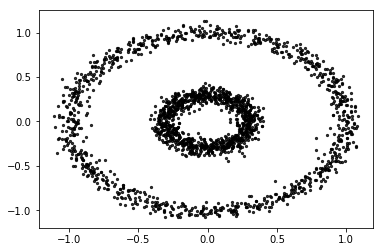

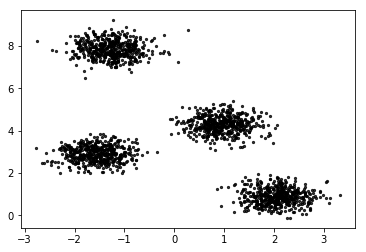

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

N_samples = 2000
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples,noise=.05,factor=.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples,centers=4,cluster_std=.4,random_state=0)[0])
plt.scatter(dataset_1[:,0],dataset_1[:,1],c='k',alpha=.8,s=5.0)
plt.show()
plt.scatter(dataset_2[:,0],dataset_2[:,1],c='k',alpha=.8,s=5.0)
plt.show()

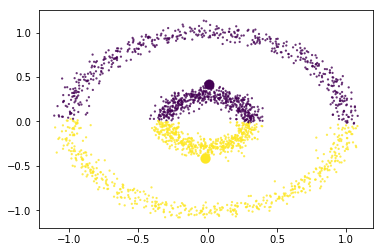

In [14]:
from sklearn.cluster import KMeans
K_dataset_1 = 2
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_
plt.scatter(dataset_1[:,0],dataset_1[:,1],c=labels_1,alpha=.8,s=5.0,lw=0)
plt.scatter(km_1.cluster_centers_[:,0],km_1.cluster_centers_[:,1],s=100,c=np.unique(labels_1),lw=.2)
plt.show()

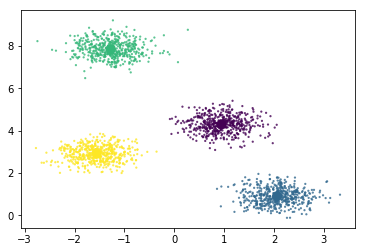

In [9]:
from sklearn.cluster import KMeans
K_dataset_2 = 4
km_2 = KMeans(n_clusters=K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:,0],dataset_2[:,1],c=labels_2,alpha=.8,s=5.0,lw=0)
plt.scatter(km_2.cluster_centers_[:,0],km_2.cluster_centers_[:,1],s=100,c=np.unique(labels_2),lw=.2)
plt.show()

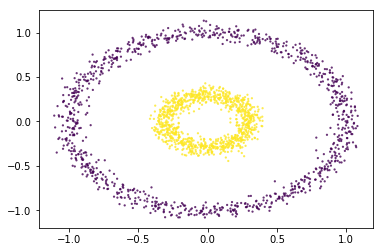

In [11]:
#SBSCAN
from sklearn.cluster import DBSCAN

dbs_1 = DBSCAN(eps=.25)
labels_1 = dbs_1.fit(dataset_1).labels_
plt.scatter(dataset_1[:,0],dataset_1[:,1],c=labels_1,alpha=.8,s=5.0,lw=0)
plt.show()

In [12]:
np.unique(labels_1)

array([0, 1], dtype=int64)

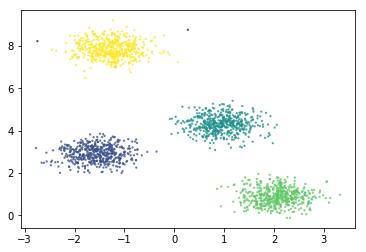

In [16]:
dbs_2 = DBSCAN(eps=.5)
labels_2 = dbs_2.fit(dataset_2).labels_
plt.scatter(dataset_2[:,0],dataset_2[:,1],c=labels_2,alpha=.8,s=5.0,lw=0)
plt.show()

In [17]:
np.unique(labels_2)

array([-1,  0,  1,  2,  3], dtype=int64)

# 第五章 社会网络分析

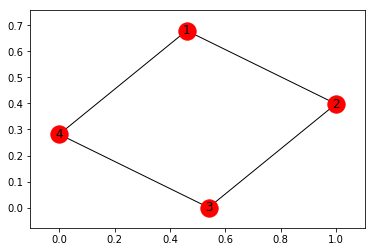

In [4]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1,2)
G.add_nodes_from([3,4])
G.add_edge(3,4)
G.add_edges_from([(2,3),(4,1)])
nx.draw_networkx(G)
plt.show()

In [7]:
print(G.nodes())
print(G.edges())
print(G.adjacency_list())

[1, 2, 3, 4]
[(1, 2), (1, 4), (2, 3), (3, 4)]
[[2, 4], [1, 3], [4, 2], [3, 1]]


In [9]:
nx.to_dict_of_lists(G)

{1: [2, 4], 2: [1, 3], 3: [4, 2], 4: [3, 1]}

In [10]:
nx.to_edgelist(G)

[(1, 2, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})]

In [11]:
nx.to_numpy_matrix(G)

matrix([[ 0.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 1.,  0.,  1.,  0.]])

In [12]:
print(nx.to_scipy_sparse_matrix(G))

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1


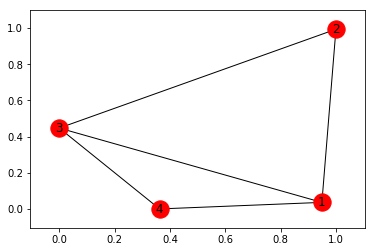

In [13]:
G.add_edge(1,3)
nx.draw_networkx(G)
plt.show()

In [14]:
G.degree()

{1: 3, 2: 2, 3: 3, 4: 2}

## 5.2 图的算法

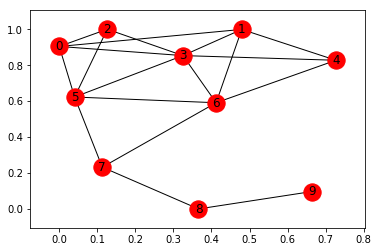

In [17]:
G = nx.krackhardt_kite_graph()
nx.draw_networkx(G)
plt.show()

In [18]:
print(nx.has_path(G,source=1,target=9))
print(nx.shortest_path(G,source=1,target=9))
print(nx.shortest_path_length(G,source=1,target=9))

True
[1, 6, 7, 8, 9]
4


In [19]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [20]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

# 第六章 可视化


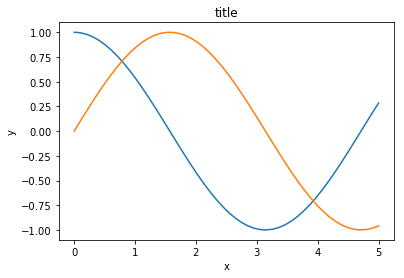

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.linspace(0,5,50)
y_cos = np.cos(x)
y_sin = np.sin(x)

plt.figure()
plt.plot(x,y_cos)
plt.plot(x,y_sin)
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

In [2]:
rcParams['axes.color_cycle'] = ['red','blue','green']

NameError: name 'rcParams' is not defined

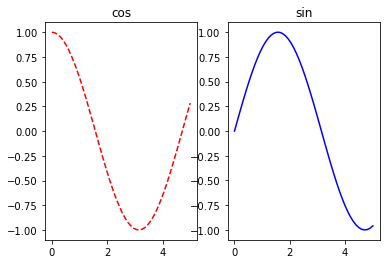

In [6]:
plt.subplot(1,2,1)
plt.plot(x,y_cos,'r--')
plt.title('cos')
plt.subplot(1,2,2)
plt.plot(x,y_sin,'b-')
plt.title('sin')
plt.show()

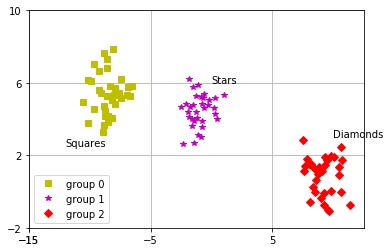

In [9]:
#散点图
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

D = make_blobs(n_samples=100,n_features=2,centers=3,random_state=7)
groups = D[1]
coordinates = D[0]

plt.plot(coordinates[groups==0,0],coordinates[groups==0,1],'ys',label='group 0')
plt.plot(coordinates[groups==1,0],coordinates[groups==1,1],'m*',label='group 1')
plt.plot(coordinates[groups==2,0],coordinates[groups==2,1],'rD',label='group 2')
plt.ylim(-2,10)
plt.yticks([10,6,2,-2])
plt.xticks([-15,-5,5,-15])
plt.grid()
plt.annotate('Squares',(-12,2.5))
plt.annotate('Stars',(0,6))
plt.annotate('Diamonds',(10,3))
plt.legend(loc='lower left',numpoints=1)
plt.show()

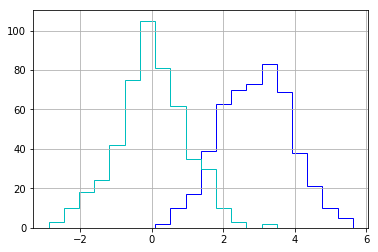

In [12]:
#直方图
x = np.random.normal(loc=.0,scale=1.0,size=500)
z = np.random.normal(loc=3.0,scale=1.0,size=500)
#plt.hist(np.column_stack((x,z)),bins=20,histtype='bar',color=['c','b'],stacked=True)
plt.hist(np.column_stack((x,z)),bins=20,histtype='step',color=['c','b'],stacked=False)
plt.grid()
plt.show()

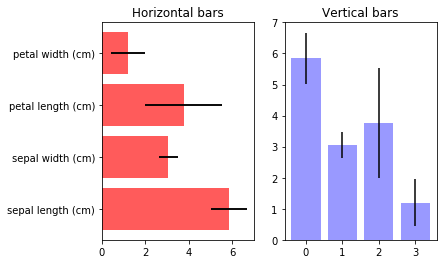

In [15]:
#柱状图
from sklearn.datasets import load_iris

iris = load_iris()
average = np.mean(iris.data,axis=0)
std = np.std(iris.data,axis=0)
range_ = range(np.shape(iris.data)[1])
plt.subplot(1,2,1)
plt.title('Horizontal bars')
plt.barh(range_,average,color='r',xerr=std,alpha=.4,align='center')
plt.yticks(range_,iris.feature_names)
plt.subplot(1,2,2)
plt.title('Vertical bars')
plt.bar(range_,average,color='b',yerr=std,alpha=.4,align='center')
plt.xticks(range_,range_)
plt.show()

In [19]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



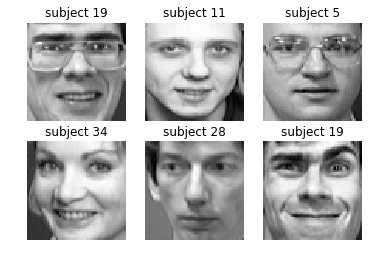

In [22]:
#图像可视化
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt

dataset = fetch_olivetti_faces(shuffle=True,random_state=5)
photo = 1
for k in range(1,7):
    plt.subplot(2,3,k)
    plt.imshow(dataset.data[k].reshape(64,64),cmap=plt.cm.gray,interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
plt.show()

## 6.2 pandas图形示例

In [23]:
import pandas as pd
print('Your pandas version is: %s' %pd.__version__)
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])

Your pandas version is: 0.19.2


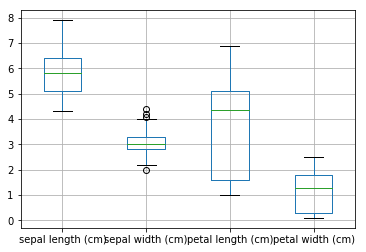

In [29]:
#%matplotlib inline
boxplots = iris_df.boxplot(return_type='axes')
boxplots
plt.show()

sepal length (cm)    Axes(0.1,0.15;0.8x0.75)
dtype: object

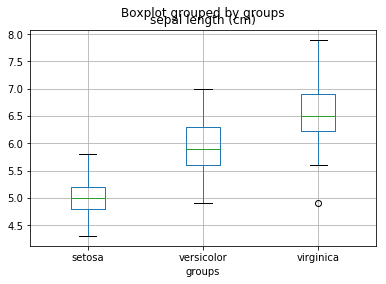

In [30]:
iris_df.boxplot(column='sepal length (cm)',by='groups',return_type='axes')

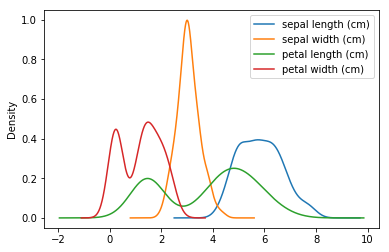

In [31]:
iris_df.plot(kind='density')

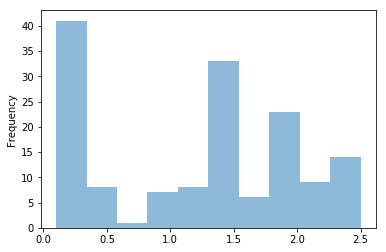

In [33]:
iris_df['petal width (cm)'].plot(kind='hist',alpha=.5)

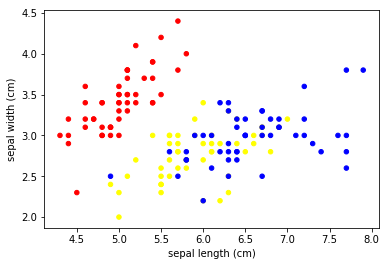

In [34]:
colors_palettes = {0:'red',1:'yellow',2:'blue'}
colors = [colors_palettes[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter',x=0,y=1,c=colors)

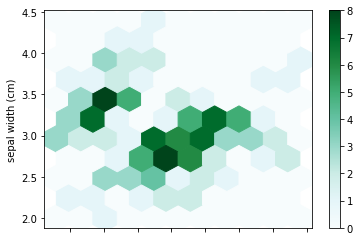

In [35]:
hexbin = iris_df.plot(kind='hexbin',x=0,y=1,gridsize=10)

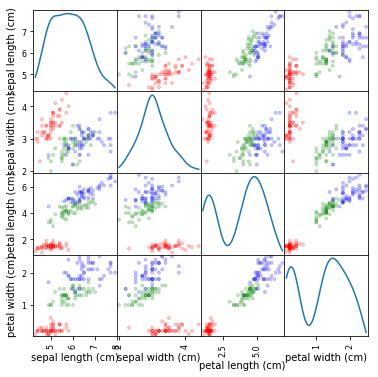

In [38]:
from pandas.tools.plotting import scatter_matrix
colors_palettes = {0:'red',1:'green',2:'blue'}
colors = [colors_palettes[c] for c in groups]

matrix_of_scatterplots = scatter_matrix(iris_df,alpha=.2,figsize=(6,6),c=colors,diagonal='kde')

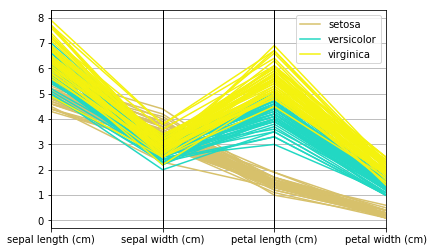

In [39]:
from pandas.tools.plotting import parallel_coordinates
pll = parallel_coordinates(iris_df,'groups')